In [504]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 0
* Print statistic about all columns with `describe()`
* Find out the dataset sizes with `shape`
* Print 4 first lines of the dataset

In [4]:
penguins = pd.read_csv("penguins_size.csv")
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins.shape

(344, 7)

In [6]:
penguins.head(4)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


# Task 1
* Find out how many penguins species are represented in the table
* Count the proportion of penguins of each species
* Print number of penguins inhabit each island

In [12]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [26]:
species = penguins.species.unique()
penguins.species.value_counts(normalize=True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

In [27]:
penguins.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

# Task 2
* Find ids of penguins with the longest and shortest culmen; print all information about these species
* Find out the difference between the longest and the shortest culmen

In [42]:
min_culmen_len_ser = penguins.nsmallest(1, "culmen_length_mm")
min_culmen_len_ser

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE


In [41]:
max_culmen_len_ser = penguins.nlargest(1, "culmen_length_mm")
max_culmen_len_ser

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE


In [63]:
max_culmen_len_ser["culmen_length_mm"].values - min_culmen_len_ser["culmen_length_mm"].values

array([27.5])

# Task 3
* Construct correlation matrix for `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` values
* Draw heatmap based on the result

In [72]:
characteristics = penguins[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
correlation = characteristics.corr()
correlation

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


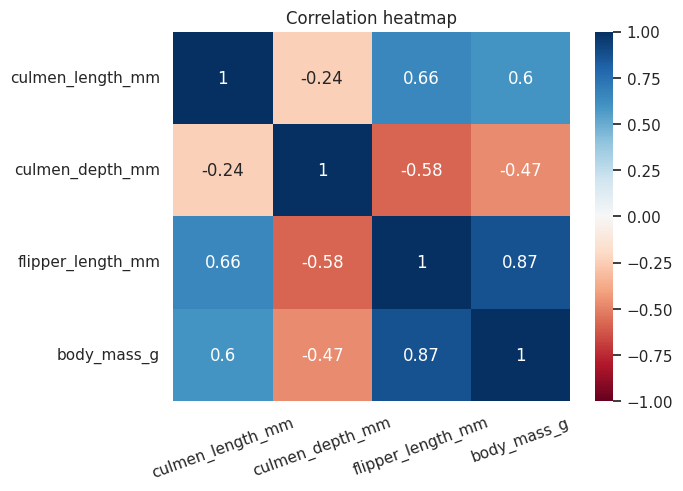

In [537]:
sns.set()
ax = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="RdBu")
plt.xticks(rotation=20)
plt.title("Correlation heatmap")
plt.show()

# Task 4
* Find out which species has the most missing data in the table
* Find out which data is more often lacking

In [270]:
cnt_row_nan = pd.DataFrame({"species": penguins.species,
                            "nan_count": penguins.isnull().sum(axis=1)})
cnt_row_nan["nan_sum"] = cnt_row_nan["nan_count"] > 0
grouped_cnt_row_nan = cnt_row_nan.groupby("species")["nan_sum"].sum()
grouped_cnt_row_nan

species
Adelie       6
Chinstrap    0
Gentoo       4
Name: nan_sum, dtype: int64

In [435]:
cnt_row_nan_dict = dict(grouped_cnt_row_nan)
max(cnt_row_nan_dict, key=cnt_row_nan_dict.get)

'Adelie'

In [250]:
cnt_column_nan = pd.DataFrame()
cnt_column_nan.index = penguins.columns.T
cnt_column_nan["result"] = penguins.isnull().sum(axis=0)
cnt_column_nan

,result
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [279]:
cnt_column_nan.nlargest(1, "result")

,result
sex,10


# Task 5
* Find out whether male and female penguins distributed evenly across each of the islands (assuming evenly means that the difference is no more than 3%)
* Show the result with the bar chart

In [342]:
sex_by_island = pd.DataFrame({"island": penguins["island"].unique()})
sex_by_island = sex_by_island.assign(male_count=[len(penguins.query("island == @x & sex == 'MALE'")) for x in sex_by_island["island"]],
                                     female_count=[len(penguins.query("island == @x & sex == 'FEMALE'")) for x in sex_by_island["island"]]
                                     )

sex_by_island = sex_by_island.assign(
    sex_ratio=abs(sex_by_island["male_count"] - sex_by_island["female_count"]) / (sex_by_island["male_count"] + sex_by_island["female_count"])
)
sex_by_island = sex_by_island.assign(is_equal=sex_by_island["sex_ratio"] <= 0.03)

sex_by_island

,island,male_count,female_count,sex_ratio,is_equal
0,Torgersen,23,24,0.021277,True
1,Biscoe,83,80,0.018405,True
2,Dream,62,61,0.008130,True


In [346]:
print("Male and female penguins distributed evenly across each of the islands: {}".format(not sex_by_island["is_equal"].__contains__(False)))

Male and female penguins distributed evenly across each of the islands: True


In [403]:
sex_count = pd.DataFrame({"island": sex_by_island["island"]})
sex_count = sex_count.assign(Male=sex_by_island[sex_by_island.island == sex_count.island]["male_count"])
sex_count = sex_count.assign(Female=sex_by_island[sex_by_island.island == sex_count.island]["female_count"])
sex_count.index = sex_by_island["island"]
sex_count = sex_count.drop(columns=["island"])

sex_count

,Male,Female
island,,
Torgersen,23,24
Biscoe,83,80
Dream,62,61


<AxesSubplot:xlabel='island'>

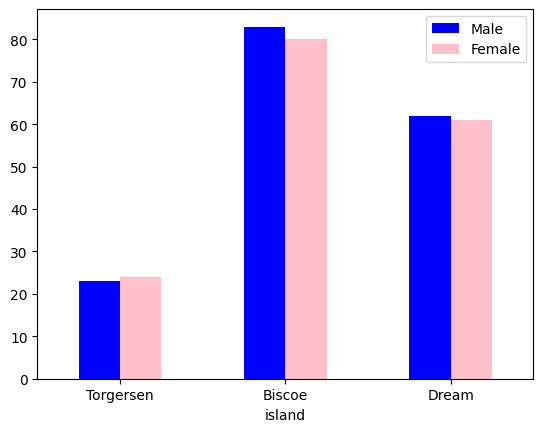

In [404]:
sex_count.plot.bar(color=["blue", "pink"], rot=0)

# Task 6
* Assuming that penguin's flipper length is one third of its height, calculate body mass index for every penguin; find out the biggest species
* Find the population of this species on each island; show the result with a pie chart

In [491]:
penguin_sizes = penguins[["species", "island", "flipper_length_mm", "body_mass_g"]].dropna()
penguin_sizes["bmi"] = round((penguin_sizes["body_mass_g"] / 1000) / (penguin_sizes["flipper_length_mm"] * 3 / 1000)**2, 8)
penguin_sizes

,species,island,flipper_length_mm,body_mass_g,bmi
0,Adelie,Torgersen,181.0,3750.0,12.718374
1,Adelie,Torgersen,186.0,3800.0,12.204365
2,Adelie,Torgersen,195.0,3250.0,9.496676
4,Adelie,Torgersen,193.0,3450.0,10.291104
5,Adelie,Torgersen,190.0,3650.0,11.234226
...,...,...,...,...,...
338,Gentoo,Biscoe,214.0,4925.0,11.949127
340,Gentoo,Biscoe,215.0,4850.0,11.657953
341,Gentoo,Biscoe,222.0,5750.0,12.963414
342,Gentoo,Biscoe,212.0,5200.0,12.855504


In [492]:
bmi_per_species = penguin_sizes[["species", "bmi"]].groupby(["species"]).mean()
bmi_per_species

,bmi
species,
Adelie,11.391065
Chinstrap,10.808740
Gentoo,11.939191


In [432]:
bmi_per_species.nlargest(1, "bmi")

,bmi
species,
Gentoo,11.939195


---
---
### I accidentally made another pie chart. Let's assume just for fun.

<AxesSubplot:title={'center':"Penguin's average BMI (percents per species)"}>

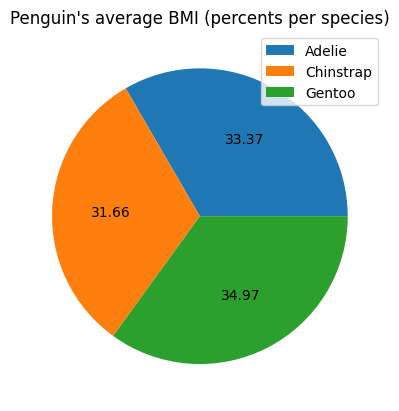

In [470]:
bmi_per_species.plot.pie(y="bmi", title="Penguin's average BMI (percents per species)", ylabel="", labels=None, autopct="%.2f")

---
---

<AxesSubplot:title={'center':'Distribution Gentoo species across the islands'}>

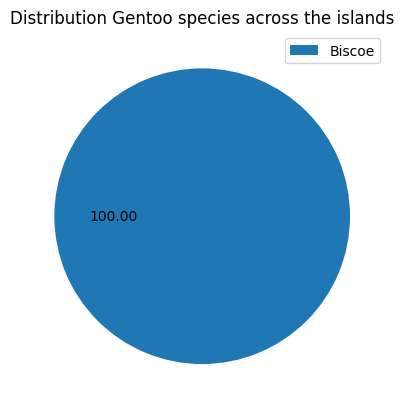

In [503]:
biggest_species = bmi_per_species.nlargest(1, "bmi").index.values[0]

biggest_per_island = penguins[["species", "island"]]
biggest_per_island = biggest_per_island[biggest_per_island.species == biggest_species]
biggest_per_island.groupby("island").count().plot.pie(
    y="species", title="Distribution {} species across the islands".format(biggest_species), ylabel="", labels=None, autopct="%.2f"
)